# **Chicago Crime Data vs Weather - 2016** 

In [69]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
%matplotlib inline

In [2]:
# Read csv's to be used for this assignment
crime_categories = pd.read_csv('CrimeCategories.csv')
weather = pd.read_csv('temperature_2016.csv')
crime = pd.read_csv('Crime_data_2016.csv')

In [50]:
weather_range = weather[(weather['Temp_Farenheit'] >= 65) & (weather['Temp_Farenheit'] <=75)]
Main_temp = weather_range['Temp_Farenheit'].count()
Tot_temp = weather['Temp_Farenheit'].count()
print(f'Total number of hours in "crime" range: {Main_temp}\nTotal number of hours total: {Tot_temp}')

Total number of hours in "crime" range: 1786
Total number of hours total: 8784


In [3]:
# Extract the month from our date field for use with future plot
crime['Month']= pd.DatetimeIndex(crime['ShortDate']).month

crime.head()

,Unnamed: 0,Case Number,Primary Type,Date,ShortDate,Hour,Year,DateConvert,Month
0,646621,JA119772,THEFT,12/31/2016 23:59,12/31/2016,23,2016,4270523,12
1,646622,JA100016,BATTERY,12/31/2016 23:58,12/31/2016,23,2016,4270523,12
2,646623,JA100012,BATTERY,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
3,646624,JA100027,LIQUOR LAW VIOLATION,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
4,646625,JA100839,CRIMINAL DAMAGE,12/31/2016 23:54,12/31/2016,23,2016,4270523,12


#### Here we merge our weather and crime data then convert the ShortDate back into datetime format

In [4]:
df = pd.merge(weather, crime, on =['ShortDate','Hour'])
df['ShortDate'] = pd.to_datetime(df['ShortDate'],format='%m/%d/%Y')

###### Merge the crime and weather table with our crime categories

In [5]:
crime_categories.rename(columns={'crime primary type':'Primary Type'},inplace=True)
combined_df = df.merge(crime_categories, how='inner',on='Primary Type')

#### Need to set up bins to break our data up into smaller groups. First determine max and min to determine bin grouping

In [6]:
maxTemp = combined_df['Temp_Farenheit'].max()
minTemp = combined_df['Temp_Farenheit'].min()
print(f"The max temp is: {maxTemp}\nThe min temp is {minTemp}")

The max temp is: 91.634
The min temp is -9.777999999999999


#### Remove duplicate columns to keep dataframe clean

In [7]:
del combined_df['DateConvert_x']
del combined_df['Unnamed: 0']
del combined_df['DateConvert_y']
del combined_df['Date']

In [8]:
combined_df.head()

,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,1,Personal
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,1,Personal
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,1,Personal
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,1,Personal
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,1,Personal


In [93]:
bins = [-15,-5,5,15,25,35,45,55,65,75,85,95]
tempName = ['< -5 degrees',
            '-5 to 4.9 degrees',
            '5 to 14.9 degrees',
            '15 to 24.9 degrees',
            '25 to 34.9 degrees',
            '35 to 44.9 degrees',
            '45 to 54.9 degrees',
            '55 to 64.9 degrees',
            '65 to 74.9 degrees',
            '75 to 84.9 degrees',
            '85 to 95 degrees']
combined_df['TempBucket'] = pd.cut(combined_df['Temp_Farenheit'],bins,labels=tempName)
combined_df.head()
weather['Temp_Farenheit']= pd.cut(weather['Temp_Farenheit'],bins, labels=tempName)

# weather_count = groupby['Temp_Farenheit'].count()

TypeError: '<' not supported between instances of 'int' and 'str'

In [109]:
weather_group = weather.groupby('Temp_Farenheit').count()
weather_group.reset_index(drop=False,inplace=True)
weather_group


AttributeError: 'str' object has no attribute 'get'

In [88]:
comb_sdev = combined_df.groupby('bucket')[['Temp_Farenheit']].std()
comb_mean = combined_df.groupby('bucket')[['Temp_Farenheit']].mean()
comb_mean


,Temp_Farenheit
bucket,
Other,53.812989
Personal,55.552056
Property,54.414878
Statutory,54.266608


#### Prep data for scatter plot of total crime over temp

Text(0.5, 1.0, 'Temperature and Crime count by types')

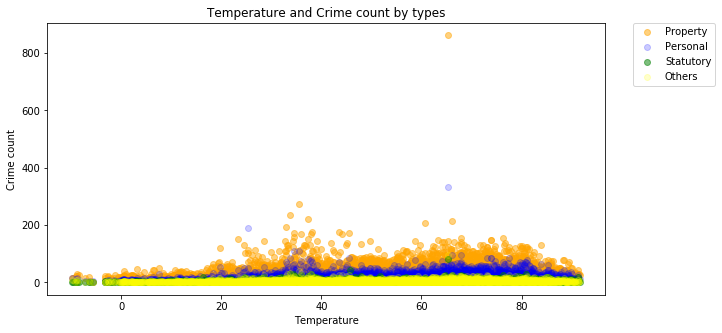

In [10]:

scatter_df = pd.pivot_table(combined_df,values='Case Number', index='Temp_Farenheit',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
scat_x = scatter_df.index.tolist()

Oth_scat = scatter_df[scatter_df.columns[0]]
Pers_scat = scatter_df[scatter_df.columns[1]]
Prop_scat = scatter_df[scatter_df.columns[2]]
Stat_scat = scatter_df[scatter_df.columns[3]]
# # scatter_df.to_csv(r'C:\Users\tepa7\Desktop\File Name.csv')
# ax = plt.plot(kind='scatter', x=scat_x, y=Oth_scat)
# plt.plot(scat_x,PersDF)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(scat_x, Prop_scat, 
        color = 'orange',
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,  
        label = 'Property')
ax.plot(scat_x, Pers_scat, 
        color = 'blue',
        linestyle='',
        marker='o',  
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Personal')
ax.plot(scat_x, Stat_scat, 
        color = 'green', 
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,
        label = 'Statutory')
ax.plot(scat_x, Oth_scat, 
        color = 'yellow', 
        linestyle='',
        marker='o', 
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Others')

# Incorporate the graph properties
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime count by types')

#### Updated the y-limit to remove the one outlier of 800+ crime commited

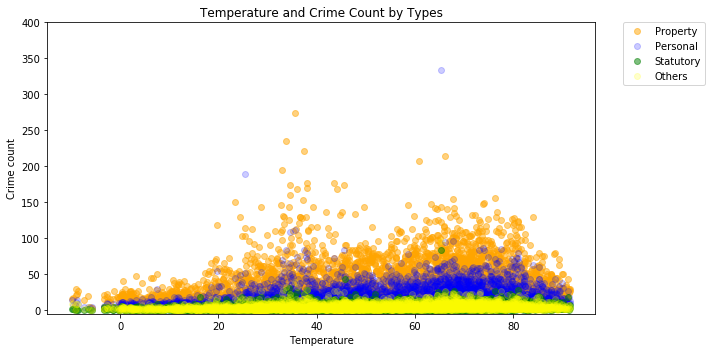

In [11]:
# Build the Scatter Plot 

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(scat_x, Prop_scat, 
        color = 'orange',
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,  
        label = 'Property')
ax.plot(scat_x, Pers_scat, 
        color = 'blue',
        linestyle='',
        marker='o',  
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Personal')
ax.plot(scat_x, Stat_scat, 
        color = 'green', 
        linestyle='', 
        marker='o', 
        alpha = 0.5, 
        linewidth = 1.0,
        label = 'Statutory')
ax.plot(scat_x, Oth_scat, 
        color = 'yellow', 
        linestyle='',
        marker='o', 
        alpha = 0.2, 
        linewidth = 1.0, 
        label = 'Others')

# Incorporate the graph properties
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime Count by Types')
ax.set_ylim(-5,400)
plt.tight_layout()
plt.savefig('TempAndCrimebyType_Scatter.png')

#### Create the pivot table and print to determine the column indices so we can extract a series for our line chart

In [12]:
mon_buckets = pd.pivot_table(combined_df,values='Case Number',
                         index='Month',
                         columns='bucket', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
mon_buckets.head(12)

bucket,Other,Personal,Property,Statutory
Month,,,,
1,1524,5543,12164,1407
2,1512,5161,10443,1573
3,1801,6423,11918,1871
4,1701,6007,11555,1854
5,1841,7052,12749,1847
6,1766,7272,13223,1760
7,1777,6964,14444,1637
8,1742,6923,14913,1275
9,1587,6539,14187,1328


In [13]:
buckets = pd.pivot_table(combined_df,values='Case Number',
                         index='TempBucket',
                         columns='bucket', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets.head()

bucket,Other,Personal,Property,Statutory
TempBucket,,,,
< -5 degrees,51,79,180,8
-5 to 4.9 degrees,179,520,1392,141
5 to 14.9 degrees,391,1310,2937,306
15 to 24.9 degrees,1005,3233,7532,902
25 to 34.9 degrees,2439,8613,19144,2249


###### Added Some add'l work to determine percentage of each temperature bucket 

In [87]:
buckets_ave = pd.pivot_table(combined_df,values='Case Number',
                         index='TempBucket',
                         columns='Year', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
tot_crime = buckets_ave.sum()
perc_by_range = buckets_ave / tot_crime
perc_by_range

Year,2016
TempBucket,
< -5 degrees,0.001182
-5 to 4.9 degrees,0.008296
5 to 14.9 degrees,0.018376
15 to 24.9 degrees,0.047099
25 to 34.9 degrees,0.120592
35 to 44.9 degrees,0.135340
45 to 54.9 degrees,0.134091
55 to 64.9 degrees,0.153203
65 to 74.9 degrees,0.211631


In [14]:
OthDF = buckets[buckets.columns[0]]
PersDF = buckets[buckets.columns[1]]
PropDF = buckets[buckets.columns[2]]
StatDF = buckets[buckets.columns[3]]
x = buckets.index.tolist()

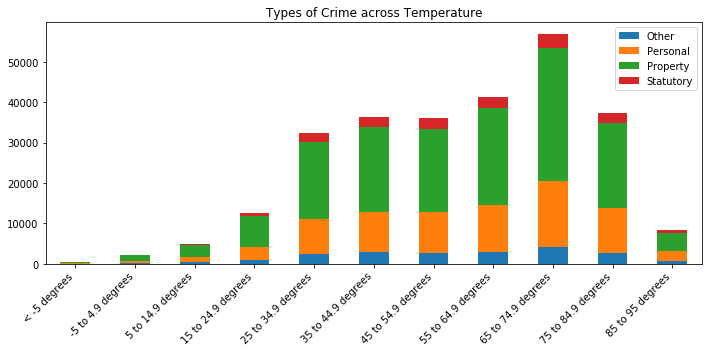

In [15]:

ax = buckets[['Other','Personal','Property','Statutory']].plot(kind='bar', stacked=True,figsize=(10, 5))
plt.xticks(rotation=45, ha='right')
ax.set_title('Types of Crime across Temperature')
plt.xlabel(None)
ax.legend(['Other','Personal','Property','Statutory']);
plt.tight_layout()
plt.savefig('TypeofCrimeBar.png')

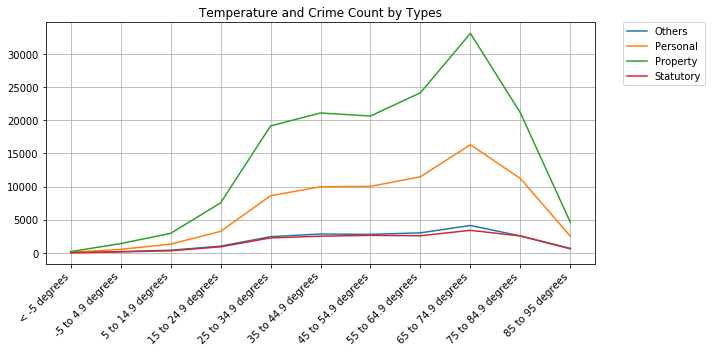

In [16]:
plt.figure(figsize=(10,5))
plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45, ha='right')
plt.title('Temperature and Crime Count by Types')
plt.grid()
plt.tight_layout()
plt.savefig('TempAndCrimebyType_Line.png')



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

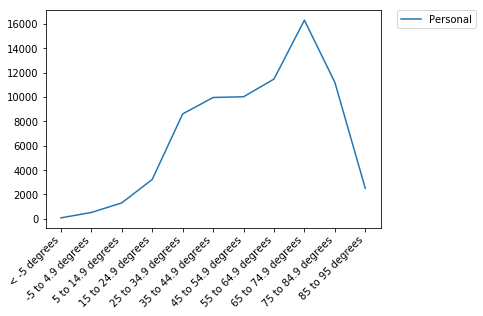

In [17]:
plt.plot(x,PersDF, label = 'Personal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45,ha='right')

In [18]:
# t = arange(0.0, 2.0, 0.01)
# s = sin(2.5*pi*t)
# plot(t, s)

# xlabel('time (s)')
# ylabel('voltage (mV)')
# title('Sine Wave')
# grid(True)
# show()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

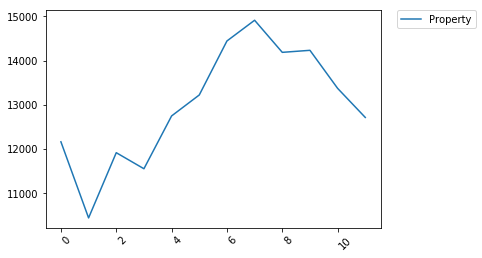

In [53]:
plt.plot(x,PropDF,label = 'Property')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45, ha='left')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

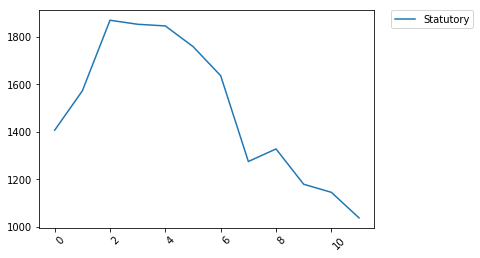

In [54]:
plt.plot(x,StatDF,label= 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45, ha='left')

In [21]:
#pivot by month

buckets_month = pd.pivot_table(combined_df,values='Case Number', index='Month',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_month

bucket,Other,Personal,Property,Statutory
Month,,,,
1,1524,5543,12164,1407
2,1512,5161,10443,1573
3,1801,6423,11918,1871
4,1701,6007,11555,1854
5,1841,7052,12749,1847
6,1766,7272,13223,1760
7,1777,6964,14444,1637
8,1742,6923,14913,1275
9,1587,6539,14187,1328


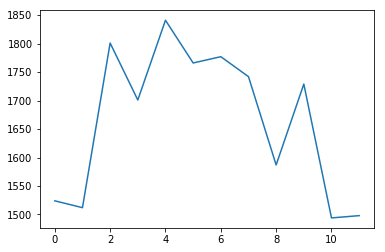

In [22]:
#plot crime by month
OthDF = buckets_month[buckets_month.columns[0]]
PersDF = buckets_month[buckets_month.columns[1]]
PropDF = buckets_month[buckets_month.columns[2]]
StatDF = buckets_month[buckets_month.columns[3]]
# x = buckets_month.index.tolist()
x= np.arange(12)
plt.plot(x,OthDF,label = 'Others')

([<matplotlib.axis.XTick at 0x29ae7844fd0>,
 <a list of 12 Text xticklabel objects>)

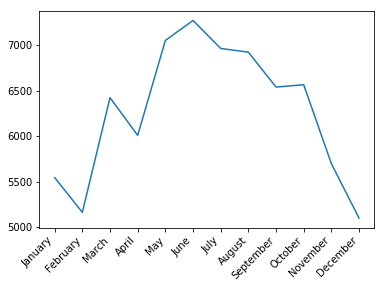

In [62]:
plt.plot(x,PersDF,label = 'Personal')
plt.xticks(np.arange(12), calendar.month_name[1:13],rotation=45,ha='right')

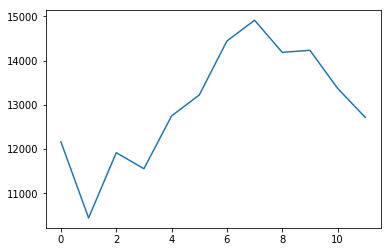

In [24]:
plt.plot(x,PropDF,label = 'Property')

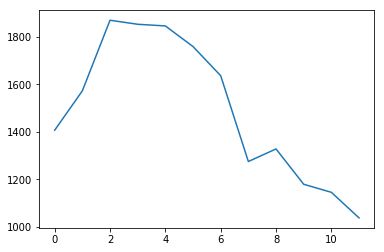

In [25]:
plt.plot(x,StatDF,label = 'Statutory')

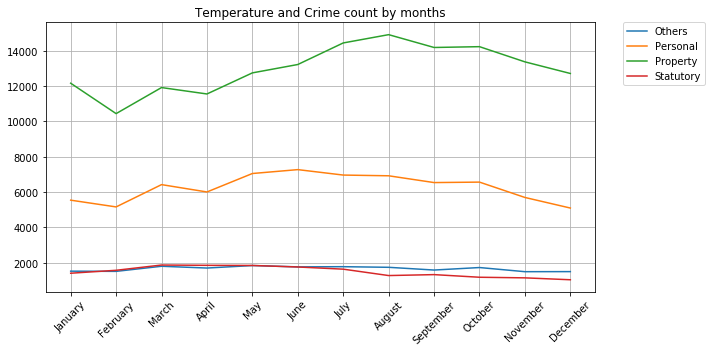

In [26]:
plt.figure(figsize=(10,5))
plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal')
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by months')
plt.xticks(np.arange(12), calendar.month_name[1:13],rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig('TempAndCrimebyMonths_Line.png')


In [27]:
#pivot by hours
buckets_hour = pd.pivot_table(combined_df,values='Case Number', index='Hour',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_hour.head()

bucket,Other,Personal,Property,Statutory
Hour,,,,
0,907,3910,7929,565
1,459,2912,4398,319
2,382,2662,3774,209
3,284,2188,3245,152
4,188,1630,2733,84


In [28]:
#Bar Charts of crimes inside respective buckets
Personal_df=combined_df.loc[combined_df["bucket"]=="Personal"]
Property_df=combined_df.loc[combined_df["bucket"]=="Property"]
Statutory_df=combined_df.loc[combined_df["bucket"]=="Statutory"]
Other_df=combined_df.loc[combined_df["bucket"]=="Other"]


In [29]:
Personalbuckets = pd.pivot_table(Personal_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
Personalbuckets

Primary Type,ASSAULT,BATTERY,CRIM SEXUAL ASSAULT,HOMICIDE,HUMAN TRAFFICKING,INTIMIDATION,KIDNAPPING,OBSCENITY,OFFENSE INVOLVING CHILDREN,PUBLIC INDECENCY,SEX OFFENSE,STALKING
TempBucket,,,,,,,,,,,,
< -5 degrees,24,49,1,0,0,0,1,0,2,0,2,0
-5 to 4.9 degrees,134,342,5,3,0,4,4,0,22,0,5,1
5 to 14.9 degrees,340,867,16,13,0,3,5,2,42,0,19,3
15 to 24.9 degrees,769,2216,55,26,0,2,11,4,100,0,38,12
25 to 34.9 degrees,2110,5671,191,83,0,19,18,7,347,1,150,16
35 to 44.9 degrees,2422,6728,209,90,2,21,33,9,326,0,106,18
45 to 54.9 degrees,2588,6608,216,84,0,17,31,8,338,1,106,25
55 to 64.9 degrees,2882,7678,229,135,2,21,30,7,334,2,135,21
65 to 74.9 degrees,4119,10846,360,171,6,29,38,9,424,3,255,53


In [30]:
Propertybuckets = pd.pivot_table(Property_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
Propertybuckets

Primary Type,ARSON,BURGLARY,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,ROBBERY,THEFT
TempBucket,,,,,,,,
< -5 degrees,0,26,17,6,41,20,9,61
-5 to 4.9 degrees,2,151,214,49,228,148,104,496
5 to 14.9 degrees,11,272,480,125,414,274,232,1129
15 to 24.9 degrees,15,712,1236,294,1164,611,567,2933
25 to 34.9 degrees,57,1866,3546,756,2727,1479,1425,7288
35 to 44.9 degrees,79,2001,4217,818,2690,1447,1620,8226
45 to 54.9 degrees,70,1916,4094,823,2665,1411,1509,8154
55 to 64.9 degrees,80,2210,4868,999,3044,1571,1825,9556
65 to 74.9 degrees,132,3077,6610,1357,3810,2227,2583,13315


In [31]:
Statutorybuckets = pd.pivot_table(Statutory_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
Statutorybuckets

Primary Type,INTERFERENCE WITH PUBLIC OFFICER,LIQUOR LAW VIOLATION,NARCOTICS,OTHER NARCOTIC VIOLATION,WEAPONS VIOLATION
TempBucket,,,,,
< -5 degrees,0,0,6,0,2
-5 to 4.9 degrees,0,1,123,0,17
5 to 14.9 degrees,12,4,250,0,40
15 to 24.9 degrees,34,10,721,1,136
25 to 34.9 degrees,75,34,1783,0,357
35 to 44.9 degrees,131,33,1934,1,412
45 to 54.9 degrees,145,25,1993,0,471
55 to 64.9 degrees,144,26,1881,0,523
65 to 74.9 degrees,192,50,2379,0,772


In [32]:
Otherbuckets = pd.pivot_table(Other_df,values='Case Number',
                         index='TempBucket',
                         columns='Primary Type', 
                         aggfunc=lambda x: len(x.unique()),fill_value=0)
print(Otherbuckets.columns)

Index(['CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'NON - CRIMINAL',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE',
       'PROSTITUTION', 'PUBLIC PEACE VIOLATION'],
      dtype='object', name='Primary Type')


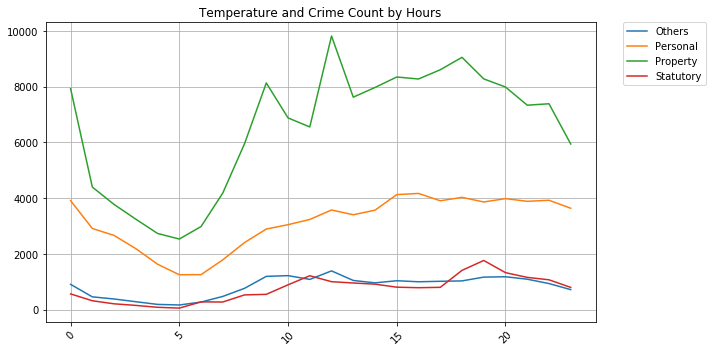

In [33]:
#plot by hours
OthDF_hr = buckets_hour[buckets_hour.columns[0]]
PersDF_hr = buckets_hour[buckets_hour.columns[1]]
PropDF_hr = buckets_hour[buckets_hour.columns[2]]
StatDF_hr = buckets_hour[buckets_hour.columns[3]]
x_hr = buckets_hour.index.tolist()

plt.figure(figsize=(10,5))
plt.plot(x_hr,OthDF_hr,label = 'Others')
plt.plot(x_hr,PersDF_hr,label = 'Personal' )
plt.plot(x_hr,PropDF_hr,label = 'Property')
plt.plot(x_hr,StatDF_hr,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime Count by Hours')
plt.grid()
plt.tight_layout()
plt.tight_layout()
plt.savefig('TempAndCrimebyHours.png')

In [34]:
#pivot by degree and hours
buckets_degree_hour = pd.pivot_table(combined_df,
                                     values='Case Number', 
                                     index='TempBucket',
                                     columns='Hour', 
                                     aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_degree_hour


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
TempBucket,,,,,,,,,,,,,,,,,,,,,
< -5 degrees,0,0,0,8,7,8,11,9,38,41,...,31,0,0,0,0,0,0,0,0,0
-5 to 4.9 degrees,50,15,16,12,21,34,47,104,140,189,...,204,231,176,97,26,0,0,0,20,18
5 to 14.9 degrees,196,139,123,102,73,76,95,148,165,220,...,302,218,218,255,367,337,276,181,159,152
15 to 24.9 degrees,424,316,289,247,198,182,274,359,599,787,...,805,764,581,559,452,458,503,445,431,428
25 to 34.9 degrees,1681,886,861,700,604,557,677,962,1415,1825,...,1681,1673,1663,1530,1572,1417,1302,1220,1244,1231
35 to 44.9 degrees,1449,1023,904,809,614,588,716,1155,1706,2280,...,1679,1895,1689,1770,2042,1884,1795,1476,1340,1171
45 to 54.9 degrees,1847,980,912,735,648,590,649,981,1366,1944,...,1972,2107,2298,1963,1786,1723,1592,1372,1632,1369
55 to 64.9 degrees,1869,1167,1040,962,805,739,893,1193,1938,2582,...,1640,1662,1692,2077,2226,2118,1901,1911,1905,1492
65 to 74.9 degrees,2805,1989,1974,1756,1399,1073,1299,1683,2114,2653,...,3484,3363,2656,2358,2447,2261,2415,2452,2237,2004
